In [119]:
# Import the required libraries 
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

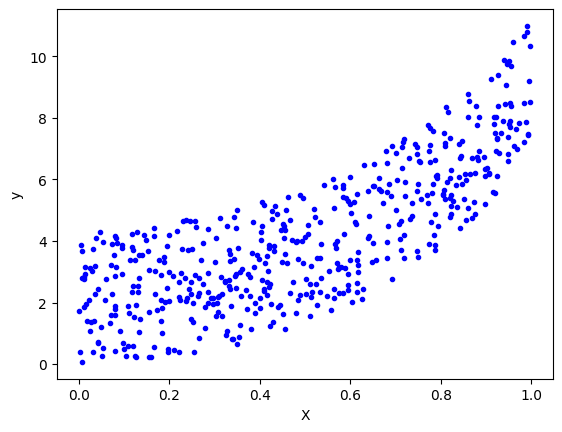

In [242]:
# Now we will generate our polynomial equation to expeiment

X = np.random.rand(500,1)  # The features
# y should be a polynomial equation ; here we will use a simple equation: y = b0 + b1x + b2(x**2)
# We will experiment the values and then insert until found a perfect polynomial curve 

y = np.random.rand(500,1)*4.43343 + (0.85*(X)) + (0.925*(X**2)) + (5*(X**3)) 

plt.plot(X,y,'b.') # We use plot for better visulization
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Got a simple polynomial curve we could have exmperimented more

In [243]:
X[:5] # Examine the values of X

array([[0.82178239],
       [0.41029536],
       [0.16552779],
       [0.29541789],
       [0.77515397]])

In [244]:
y[:5] # Examine the values of y

array([[5.49785587],
       [5.16930159],
       [4.42029694],
       [2.14309551],
       [6.93296937]])

In [245]:
X.shape,y.shape # Examine the shape

((500, 1), (500, 1))

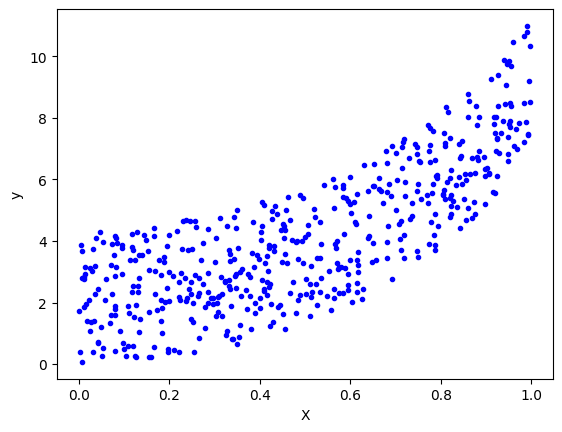

In [246]:
# Now lets plot this and visualize whether this is a polynomial or not . 
plt.plot(X,y,'b.') # We use plot for better visulization
plt.xlabel('X')
plt.ylabel('y')
plt.show()
# I experimented more and found thic curve

In [247]:
# Splitting the dataset into train and test set.
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [248]:
# Now we will try to fit this points using Linear Regression
lr = LinearRegression()

In [249]:
lr.fit(X_train,y_train) # Fitting the training sets

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [250]:
y_pred = lr.predict(X_test) # Prediction on testing set

In [251]:
# R2 score for the prediction
r2_score(y_test,y_pred)

0.6734144263187622

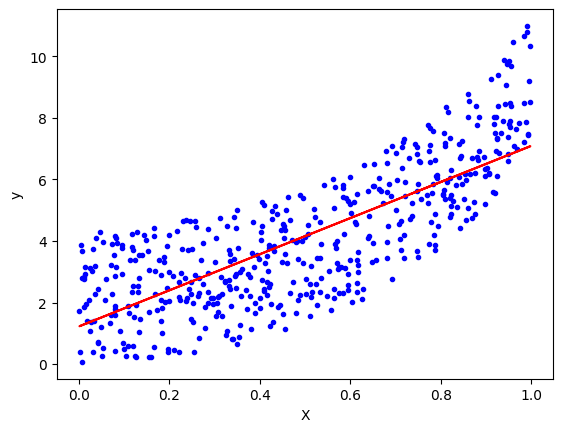

In [252]:
# Now lets visualize the line predicted to fit the curve
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red') 
# We use X here cause the no of rows and columns for X and y parameter must be same , also we wanted the whole line so X.
plt.xlabel('X')
plt.ylabel('y')
plt.show()
# We can clearly see the line is trying to fit but just cant cause it is a curve.
# For proper fitting we need a curve instead .

In [ ]:
# As we can see the line is unable to fit accordingly , and we are not able to justify it.
# Now we will use Polynomial Regression using Polynomial Features
# We will pass in the degree and we will get n columns accordingly from degree 0 to n

poly = PolynomialFeatures(degree=3 # The degree of the equation 
                          ,include_bias=True
                          ) # Instanitation
X_train_trans = poly.fit_transform(X_train)
 # We use fit transform once on X_train so it learns ON X_train data and there is no data leaks to X_test.
X_test_trans = poly.transform(X_test)

In [254]:
X_train[0],X_train_trans[0] # Here we can check the polynomial columns formed for that value 

(array([0.56890966]), array([1.        , 0.56890966, 0.3236582 , 0.18413228]))

In [ ]:
# Now we will fit this again usingLinear Regression model.
plr = LinearRegression()

In [ ]:
plr.fit(X_train_trans,y_train) # fit the transformed x training set 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
plr.coef_,plr.intercept_ # examine the coeffecients and intercepts

(array([[0.        , 0.33398486, 1.99175216, 4.07462088]]),
 array([2.31444099]))

In [258]:
r2_score(y_test,plr.predict(X_test_trans)) # As we can see the model performance improved

0.7416704796845701

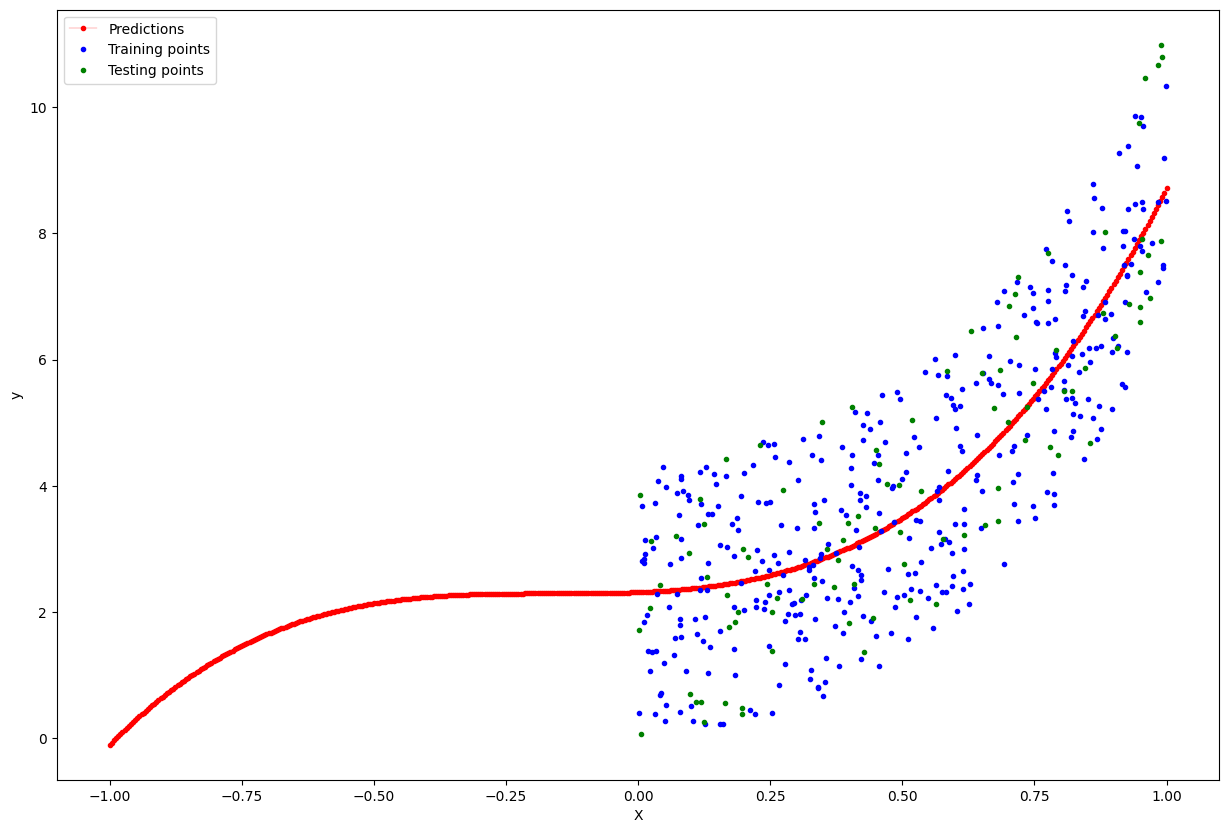

In [ ]:
# Needed variables for plotting the curve
X_new=np.linspace(-1, 1, 500).reshape(500, 1) # We took this by considering the boundaries of the graph in y axis for visualization.
X_new_poly = poly.transform(X_new)
y_new = plr.predict(X_new_poly)

# Now lets visualize the graph
plt.figure(figsize=(15,10))
plt.plot(X_new,y_new,'r.-',linewidth=0.2,label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training points') 
plt.plot(X_test,y_test,'g.',label='Testing points') 
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Now using a function that plots graph provided the degree
def polynomial_regression(degree):
    X_new=np.linspace(-1, 1, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    # Pipeline to make sure the data is intact and follows every process in order
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y) # Fit X and y 
    # (We should actually have modified this pipeline and made train test split for X and y and then proceeded with the rest, 
    # but we are just predicting the curve in this case and not making any transformation on the split data as we need 
    # for visualization ).

    y_newbig = polynomial_regression.predict(X_new) # predict the curve
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-1, 1.5, 0, 10])
    plt.show()

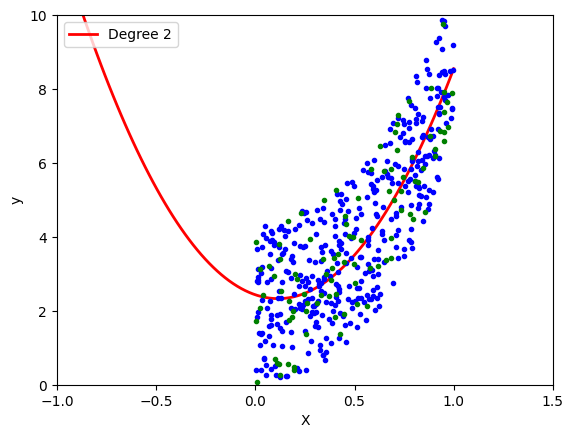

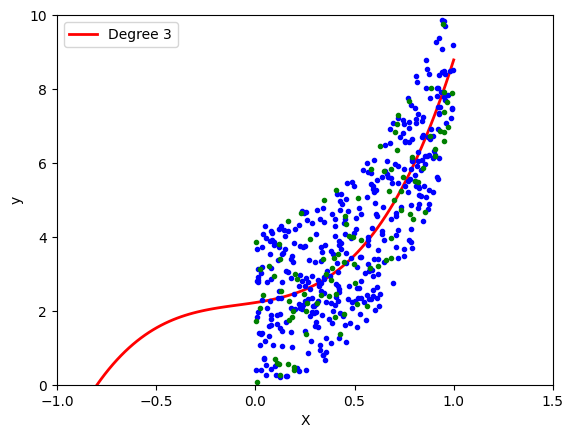

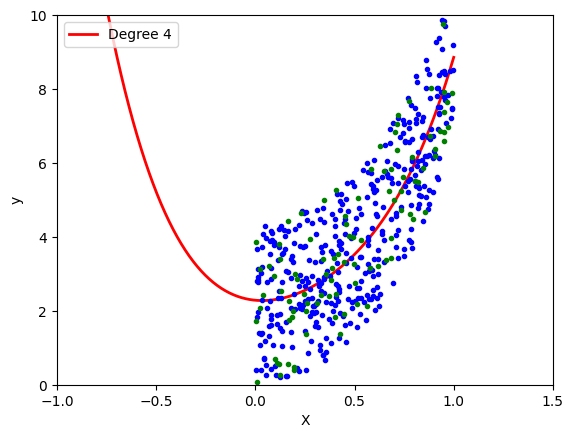

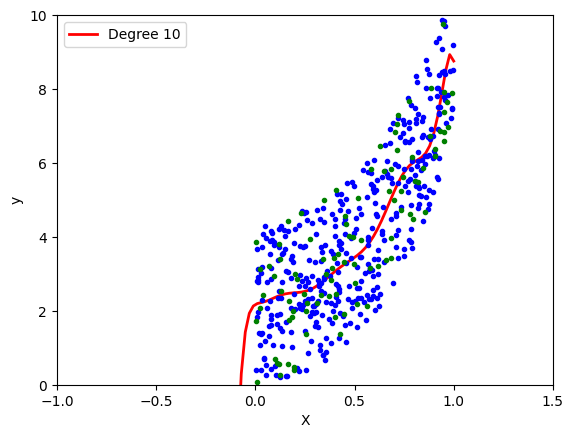

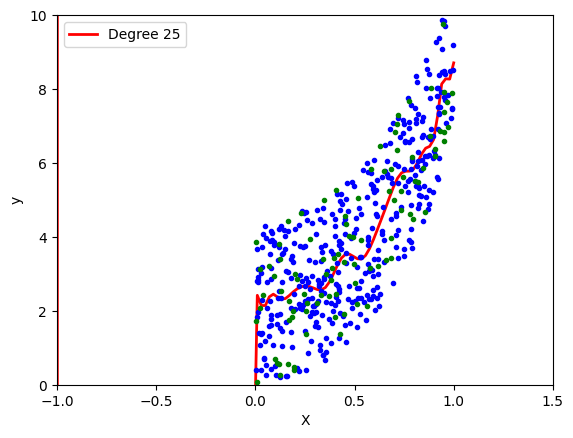

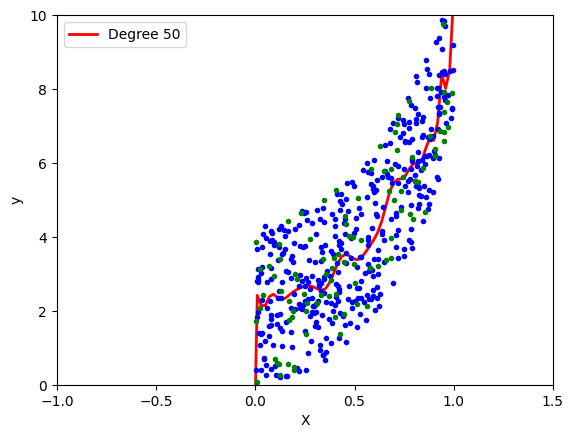

(None, None, None, None, None, None)

In [261]:
polynomial_regression(2),polynomial_regression(3),polynomial_regression(4),polynomial_regression(10),polynomial_regression(25),polynomial_regression(50)

In [ ]:
# We have to make sure there is no overfitting ,and underfitting .
# So we have to choose the degree accurately as it is a hyperparameter.

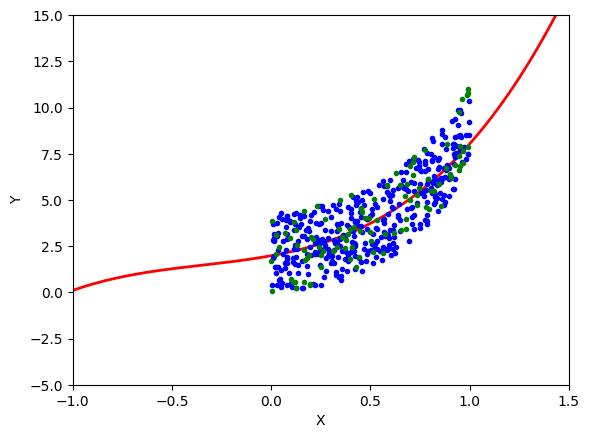

In [ ]:
# Now lets apply Gradient Descent on this and check its performance

#Instanitate the SGDRegressor with max_iterations
sgd = SGDRegressor(max_iter=100)

sgd.fit(X_train_trans,y_train.ravel()) # Fit the data

# Now lets talk about the curve we are gonna plot with the help of linspace.
# Linspace helps us to create no of points between start and stop .
X_new = np.linspace(-2.9,2.8,200).reshape(200,1) # We reshape to convert this to 2D
X_new_poly = poly.transform(X_new) # Transformation for whole X range
y_new = sgd.predict(X_new_poly) # Prediction on X_new_poly

y_pred = sgd.predict(X_test_trans) # Prediction on test set

# Plotting this
plt.plot(X_new,y_new,'r-',linewidth=2,label='Curve')
plt.plot(X_train,y_train,'b.',label='Training set')
plt.plot(X_test,y_test,'g.',label='Testing set')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([-1, 1.5, -5 ,15 ])
plt.show()
plt.show()

# There might be some changes here addressed later.